<a href="https://colab.research.google.com/github/Afsaneh-Esm/Eniac/blob/main/A_B_testing_for_Eniac.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns

# Hypothesis testing: Chi-Square Test within the Eniac case study

In this notebook we perform a chi-square test with the data from the Eniac case study, applying a post-hoc correction to perform pairwise tests and find the true winner.

## 1.&nbsp;State the Null Hypothesis and the Alternative Hypothesis.

Null Hypothesis ($H_0$): The click-through rate for all versions of the website is equal.

Alternative Hypothesis ($H_A$): The click-through rate for at least one version of the website differs.


## 2.&nbsp; Select an appropriate significance level alpha ($\alpha$).

It was decided that a relatively high alpha was acceptable in this case

In [2]:
alpha = 0.05

## 3.&nbsp; Collect data that is random and independent

The important pieces of information (clicks on each element of interest & visits on each page) are scattered around. Let's collect them.

Importing the csv's

In [3]:
# Element list eniac_a.csv
url = 'https://drive.google.com/file/d/1x4DwDVc7uA2eIMEkmujmv81SfANjm6GC/view?usp=drive_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
eniac_a_df = pd.read_csv(path)

# Element list eniac_b.csv
url = 'https://drive.google.com/file/d/1Z4vLwetcGbk75cRihAp_rVtQ879vPYhu/view?usp=drive_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
eniac_b_df = pd.read_csv(path)

# Element list eniac_c.csv
url = 'https://drive.google.com/file/d/1mFk5UkygtUAmwx3KD3y8WRQVkF959YCv/view?usp=drive_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
eniac_c_df = pd.read_csv(path)

# Element list eniac_d.csv
url = 'https://drive.google.com/file/d/1e5ldQGnyQIL5UWYe1nDiKReNr1NGNvzg/view?usp=drive_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
eniac_d_df = pd.read_csv(path)

How many clicks did each element get?

In [4]:
eniac_a_df

,Element ID,Tag name,Name,No. clicks,Visible?,Snapshot information
0,48,h1,ENIAC,269,True,Homepage Version A - white SHOP NOW • http...
1,25,div,mySidebar,309,True,created 2021-09-14 • 14 days 0 hours 34 mi...
2,4,a,Mac,279,True,NaN
3,69,a,iPhone,246,True,NaN
4,105,a,Accessories,1235,True,NaN
5,36,a,Chargers & Cables,1261,False,NaN
6,99,a,iPhone Accessories,1226,False,NaN
7,68,a,Watch Accessories,1261,False,NaN
8,13,a,Mac Accessories,1308,False,NaN
9,15,a,AirTag,206,False,NaN


In [5]:
eniac_a_clicks = eniac_a_df.loc[eniac_a_df["Name"]=="SHOP NOW", "No. clicks"].iloc[0]
eniac_b_clicks = eniac_b_df.loc[eniac_b_df["Name"]=="SHOP NOW", "No. clicks"].iloc[0]
eniac_c_clicks = eniac_c_df.loc[eniac_c_df["Name"]=="SEE DEALS", "No. clicks"].iloc[0]
eniac_d_clicks = eniac_d_df.loc[eniac_d_df["Name"]=="SEE DEALS", "No. clicks"].iloc[0]

How many visits did each page get (they are in the last column of the second row, we read them manually)?

In [6]:
eniac_a_df.iloc[1, -1]

'created 2021-09-14   •   14 days 0 hours 34 mins   •   25326 visits, 23174 clicks'

In [7]:
eniac_a_visits = 25326
eniac_b_visits = 24747
eniac_c_visits = 24876
eniac_d_visits = 25233

From the above information, we can calculate the number of visitors who didn't click on the button

In [8]:
eniac_a_no_click = eniac_a_visits - eniac_a_clicks
eniac_b_no_click = eniac_b_visits - eniac_b_clicks
eniac_c_no_click = eniac_c_visits - eniac_c_clicks
eniac_d_no_click = eniac_d_visits - eniac_d_clicks

Now we can make a contingency table that shows the clicks and no clicks for each version of the website

In [9]:
clicks = [eniac_a_clicks, eniac_b_clicks, eniac_c_clicks, eniac_d_clicks]
noclicks = [eniac_a_no_click, eniac_b_no_click, eniac_c_no_click, eniac_d_no_click]

observed_results = pd.DataFrame(data = [clicks, noclicks],
                                columns = ["Version_A", "Version_B", "Version_C", "Version_D"],
                                index = ["Click", "No-click"])

observed_results

,Version_A,Version_B,Version_C,Version_D
Click,512,281,527,193
No-click,24814,24466,24349,25040


## 4.&nbsp; Calculate the test result

In [10]:
chisq, pvalue, dof, expected = stats.chi2_contingency(observed_results)

In [11]:
chisq

224.01877488058412

In [12]:
dof

3

In [13]:
pvalue

2.7161216607868712e-48

In [14]:
expected

array([[  382.48625502,   373.74189974,   375.69012397,   381.08172127],
       [24943.51374498, 24373.25810026, 24500.30987603, 24851.91827873]])

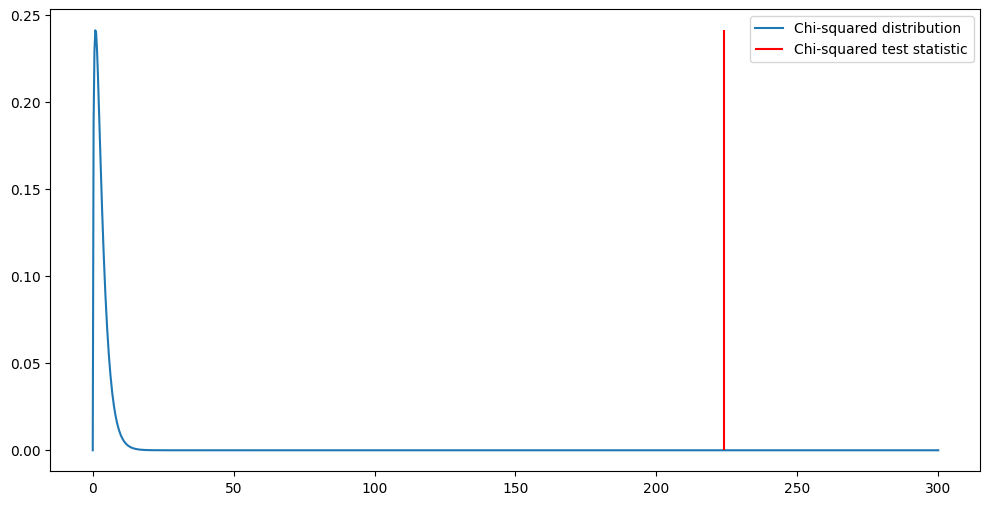

In [15]:
import matplotlib.pyplot as plt
from scipy.stats import chi2
plt.figure(figsize=(12,6))

xt = np.linspace(0,300,1000)

plt.plot(xt, chi2.pdf(xt,dof), label="Chi-squared distribution")

plt.vlines(chisq, ymin=0, ymax=max(chi2.pdf(xt,dof)), color="red", label="Chi-squared test statistic")
plt.legend()
plt.show()

## 5.&nbsp; Interpret the test result

In [16]:
if pvalue > alpha:
  print("Do not reject the null hypothesis")
else:
  print("Reject the null hypothesis")

Reject the null hypothesis


Since the p-value is (much) smaller than alpha, we reject the Null Hypothesis.

> Remember: **If p is low, the Null must go!**

This means that at least one of the four different versions performed significantly better or worse than the others.

# But how do we decide who's the winner?
# **Post Hoc Tests:**

We have 6 possible dual tests to perform:
* Version A - Version B
* Version A - Version C
* Version A - Version D
* Version B - Version C
* Version B - Version D
* Version C - Version D



In [17]:
0.95**6

0.7350918906249998

In [18]:
possible_combinations = 6
alpha_post_hoc = alpha / possible_combinations
alpha_post_hoc

0.008333333333333333

In [19]:
1-alpha_post_hoc

0.9916666666666667

In [20]:
(1-alpha_post_hoc)**6

0.9510301646897641

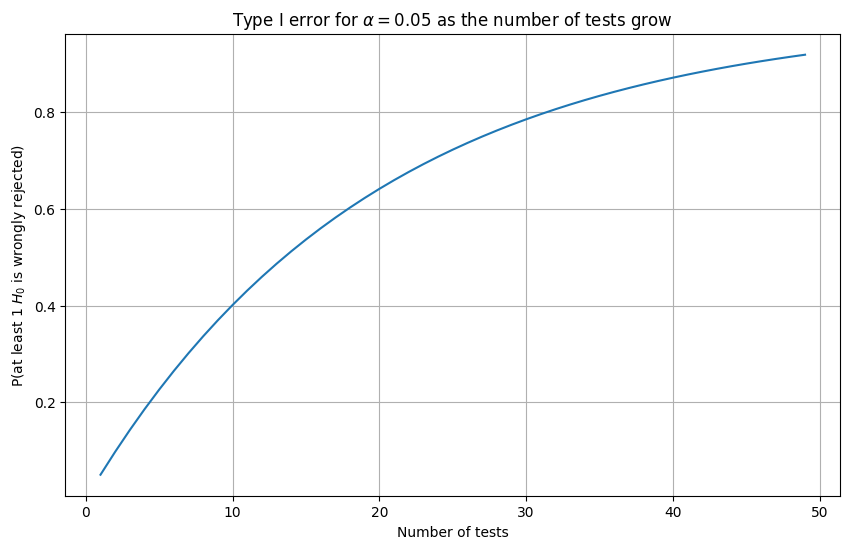

In [ ]:
# @title
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
alpha=0.05
# Define your data
x = list(range(1, 50))
y = [1-((1-alpha)**i) for i in x]


# Create a DataFrame from the data
df = pd.DataFrame({'x': x, 'y': y})

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x='x', y='y', data=df)
plt.title(f'Type I error for $\\alpha={alpha}$ as the number of tests grow')
plt.xlabel('Number of tests')
plt.ylabel('P(at least 1 $H_0$ is wrongly rejected)')
plt.grid(True)
plt.show()


In [21]:
# @title
import plotly.graph_objects as go
import math

#labels = [f'Test {i} {j}' for i in range(1,7) for k in range(0,2**(i-1)) for j in ["Fail", "Success"]]

values=[]
labels=['probability']
colors=['black']
sources=[]
targets=[]

def tree(level,probability,parent_idx,end_level=7):
  if level==end_level:
    return
  labels.extend([f'Test {level} fail',f'Test {level} success'])
  idx=len(labels)-2
  sources.extend([parent_idx,parent_idx])
  targets.extend([idx,idx+1])
  values.extend([probability*0.05,probability*0.95])
  colors.extend(['red','green'])

  tree(level+1,probability*0.05,idx)
  tree(level+1,probability*0.95,idx+1)


tree(1,1,0)


fig = go.Figure(data=[go.Sankey(
    valueformat = ".03r",
    node = dict(
      pad = 15,
      thickness = 20,
      line = dict(color = "black", width = 0.5),
      label = labels,
      color = colors
    ),
    link = dict(
      source = sources,
      target = targets,
      value = values
  ))])

fig.update_layout(title_text="Basic Sankey Diagram", font_size=10,height=1000)
fig.show()

Before we begin, let's have a look at the click through rates to see the relative success of each version

In [22]:
# click-through rates
eniac_a_ctr = eniac_a_clicks / eniac_a_visits
eniac_b_ctr = eniac_b_clicks / eniac_b_visits
eniac_c_ctr = eniac_c_clicks / eniac_c_visits
eniac_d_ctr = eniac_d_clicks / eniac_d_visits

# display as DataFrame
rates = [eniac_a_ctr, eniac_b_ctr, eniac_c_ctr, eniac_d_ctr]
names = ["Version_A", "Version_B", "Version_C", "Version_D"]

ctr_df = pd.DataFrame({"rates": rates, "names": names})
ctr_df.sort_values("rates", ascending=False)

,rates,names
2,0.021185,Version_C
0,0.020216,Version_A
1,0.011355,Version_B
3,0.007649,Version_D


It appears that the two white buttons have achieved the highest level of success. However, to gain a comprehensive understanding of statistical significance, we will conduct a post hoc test across all versions. Nonetheless, our primary emphasis should be on analysing the discrepancy between the white "SEE DEALS" and the white "SHOP NOW" buttons, as well as the disparity between these two and the remaining versions.

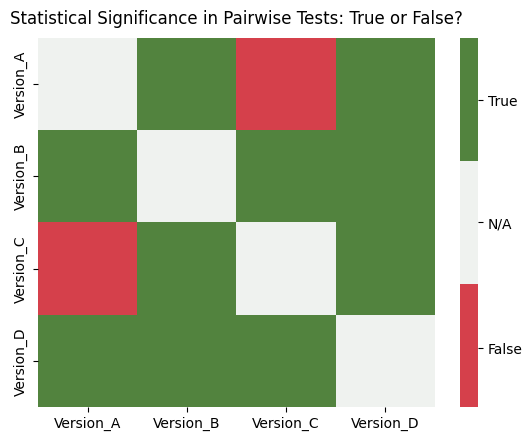

In [23]:
# @title
# empty dictionary to fill with our results
stat_significant_dict = {
                        "Version_A": [],
                        "Version_B": [],
                        "Version_C": [],
                        "Version_D": []
                         }

# compare each version to each other version
for i in observed_results.columns:
  for j in observed_results.columns:
    # if testing against self, set value to 2 for different color
    if i==j:
      stat_significant_dict[i].append(0.5)
      continue # skip to the next j
    # use scipy to find the p-value of each pair
    chisq, pvalue, df, expected = stats.chi2_contingency(observed_results.loc[:, [i, j]], correction=False)
    # boolean: if the p-value is lower than alpha, our result is statistically significant
    stat_significant_dict[i].append(1.0 if pvalue < alpha_post_hoc else 0.0)

# create a DataFrame of results
stat_significant_df = pd.DataFrame(stat_significant_dict,
                                   index=observed_results.columns)

# create a heatmap from the DataFrame & red/green colour palette
red_green_palette = sns.diverging_palette(10, 120, n=3, s=70, l=50)

# change diagonals values

ax = sns.heatmap(stat_significant_df, cmap=red_green_palette)

# Manually specify colorbar labelling after it's been generated
colorbar = ax.collections[0].colorbar
colorbar.set_ticks([0.16,0.5 ,0.83])
colorbar.set_ticklabels(['False', 'N/A','True'])

# Add a title to the heatmap
ax.set_title("Statistical Significance in Pairwise Tests: True or False?", pad=10);

# Analysing our heatmap, it is evident that the version with the highest click-through rate, `Version_C`, exhibits a statistically significant difference when compared Versions B and D, but not to `Version_A`, which possesses the second-highest click-through rate. As a result, declaring a clear winner based on post hoc tests becomes challenging, therefore we can only say that both **`Version_C'**`and `**Version_A**` are the winners.
